In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report,
    RocCurveDisplay, ConfusionMatrixDisplay
)

In [ ]:
import pandas as pd

# Baca file dataset
df = pd.read_csv('/content/calonpembelimobil.csv')

# Tampilkan 5 baris pertama
print(df.head())


   ID  Usia  Status  Kelamin  Memiliki_Mobil  Penghasilan  Beli_Mobil
0   1    32       1        0               0          240           1
1   2    49       2        1               1          100           0
2   3    52       1        0               2          250           1
3   4    26       2        1               1          130           0
4   5    45       3        0               2          237           1


In [ ]:

df.describe()


,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000
mean,500.500000,43.532000,1.469000,0.481000,0.95200,270.09000,0.633000
std,288.819436,12.672078,1.073402,0.499889,0.80146,95.23681,0.482228
min,1.000000,24.000000,0.000000,0.000000,0.00000,95.00000,0.000000
25%,250.750000,33.000000,1.000000,0.000000,0.00000,187.00000,0.000000
50%,500.500000,43.000000,1.000000,0.000000,1.00000,258.50000,1.000000
75%,750.250000,53.000000,2.000000,1.000000,2.00000,352.25000,1.000000
max,1000.000000,164.000000,3.000000,1.000000,4.00000,490.00000,1.000000


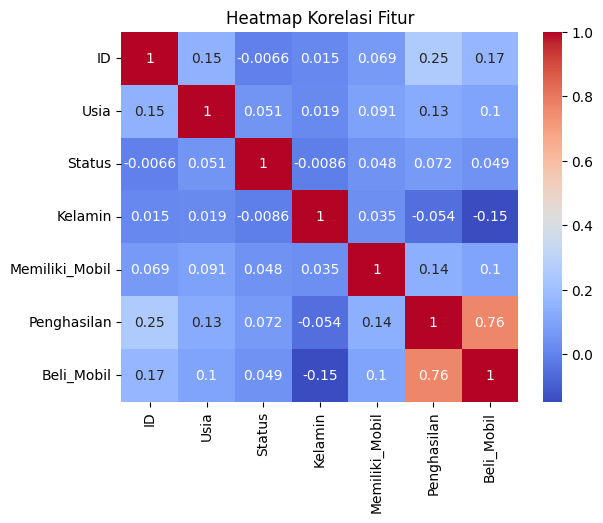

In [ ]:
corr = df.corr(numeric_only=True)
import seaborn as sns
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Heatmap Korelasi Fitur")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
X = df[['Usia', 'Status', 'Kelamin', 'Memiliki_Mobil', 'Penghasilan']]
y = df['Beli_Mobil']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (1000, 5)
y shape: (1000,)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000, solver='lbfgs', class_weight='balanced', random_state=42)
model.fit(X_train_scaled, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [ ]:
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

print("Akurasi:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))


Akurasi: 0.9233333333333333
Precision: 0.9664804469273743
Recall: 0.9105263157894737
F1-score: 0.9376693766937669
ROC-AUC: 0.9729665071770336


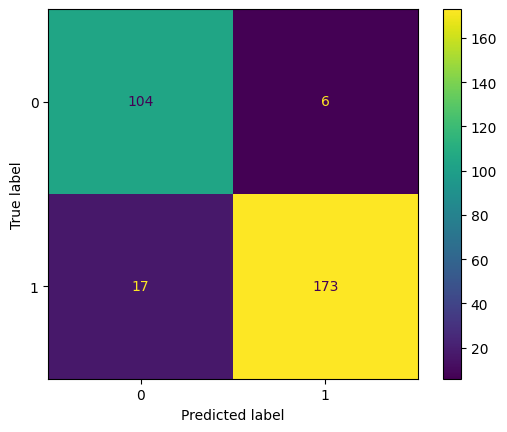

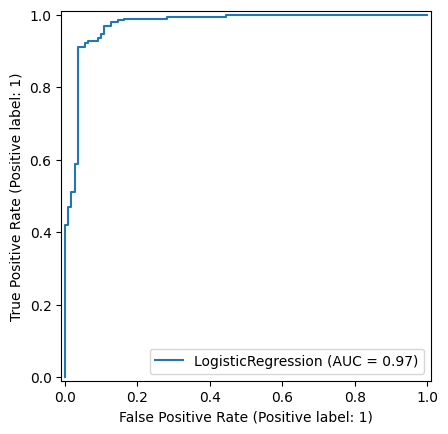

In [ ]:
ConfusionMatrixDisplay.from_estimator(model, X_test_scaled, y_test)
plt.show()

RocCurveDisplay.from_estimator(model, X_test_scaled, y_test)
plt.show()


In [ ]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.86      0.95      0.90       110
           1       0.97      0.91      0.94       190

    accuracy                           0.92       300
   macro avg       0.91      0.93      0.92       300
weighted avg       0.93      0.92      0.92       300



In [ ]:
data_baru = pd.DataFrame({
    'Usia': [27, 45],
    'Status': [1, 3],
    'Kelamin': [1, 0],
    'Memiliki_Mobil': [0, 1],
    'Penghasilan': [180, 250]
})
data_baru_scaled = scaler.transform(data_baru)
prediksi = model.predict(data_baru_scaled)
print("Hasil Prediksi:", prediksi)


Hasil Prediksi: [0 1]
